# Covid19 Data in Korea

__13 & 14기 정규세션 10주차 중 첫 주인 1주차 EDA과제입니다.__   

데이터 출처 : 

>기본적으로 데이터 EDA, Visualization을 진행하고 data Pre-Processing, Feature Engineering 의 진행과 10가지 insight를 도출합니다.  
최종적으로 bokeh를 활용한 시각화까지 진행합니다.  


****

### colab 실행시

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#cd /content/drive/My Drive/Tobigs_HW_Advanced/week1

## Ready

In [48]:
# ready
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['fivethirtyeight'])
#plt.style.use(['dark_background'])
plt.style.use('seaborn-dark')

# Pandas 출력 최대치 설정, 열24개, 행 20개
pd.set_option('max_columns', 25,'max_rows', 25) 
%matplotlib inline

# 한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' 

## 1. Load Data & EDA
EDA assignment : Assignment_data.csv

### 데이터 설명 참고  

Assignment_data : 설명이 제곧내
  
case_id  
province_x : 도시명  
city : 행정구역명    
group : 집단감염    
infection_case : 감염사례  
confirmed : 확진자 수  
latitude_x  
longtitude_x   
elementary_shcool_count  
kindergarten_count  
university_count  
academy_ratio  
elderly_population_ratio : 노인인구 비율  
elderly_alone_ratio : 독거노인 비율  
nursing_home_count : 요양시설 갯수  

In [5]:
data = pd.read_csv('Assignment_data.csv')
data.head(3)

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909


In [6]:
# case_id 버림
data = data.iloc[:,1:]

In [32]:
data['group'].unique()      # group에는 true 밖에 없음 -> 버림

array([ True])

In [34]:
data = data[data.columns.difference(['group'])]

In [36]:
data.head()

,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1
2,0.89,Gwanak-gu,30,4.9,15.12,22,Wangsung Church,33,37.481735,126.930121,909,Seoul,1
3,1.00,Guro-gu,95,5.7,16.21,26,Guro-gu Call Center,34,37.508163,126.884387,741,Seoul,3
4,1.00,Guro-gu,41,5.7,16.21,26,Manmin Central Church,34,37.481059,126.894343,741,Seoul,3


In [37]:
# target = confirmed 로 빼놓은 dataframe 만듦
target = data['confirmed']
len(target)

117

In [38]:
# data에서 target 제외 데이터프레임 만들어 놓기
df = data[data.columns.difference(['confirmed'])]
df.head()

,academy_ratio,city,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
0,0.68,Yongsan-gu,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1
1,0.89,Gwanak-gu,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1
2,0.89,Gwanak-gu,4.9,15.12,22,Wangsung Church,33,37.481735,126.930121,909,Seoul,1
3,1.00,Guro-gu,5.7,16.21,26,Guro-gu Call Center,34,37.508163,126.884387,741,Seoul,3
4,1.00,Guro-gu,5.7,16.21,26,Manmin Central Church,34,37.481059,126.894343,741,Seoul,3


이제 13개의 컬럼이 있고 총 데이터 갯수 117개, null 없음   
데이터 타입은 dtypes: bool(1), float64(3), int64(4), object(5)  
EDA 및 Visualization 은 target도 있는 데이터프레임 data 사용하겠음  

In [39]:
# null 값과 dtype 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   academy_ratio             117 non-null    float64
 1   city                      117 non-null    object 
 2   confirmed                 117 non-null    int64  
 3   elderly_alone_ratio       117 non-null    float64
 4   elderly_population_ratio  117 non-null    float64
 5   elementary_school_count   117 non-null    int64  
 6   infection_case            117 non-null    object 
 7   kindergarten_count        117 non-null    int64  
 8   latitude_x                117 non-null    object 
 9   longitude_x               117 non-null    object 
 10  nursing_home_count        117 non-null    int64  
 11  province_x                117 non-null    object 
 12  university_count          117 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 12.0+ KB


컬럼 13개 null 없음, 총 117개 데이터  
float64(3), int64(5), object(5)
으로 연속형 변수는 3개, 숫자형은 총 8개임  

In [40]:
# 숫자형 8개에 대한 기술통계 확인
data.describe()

,academy_ratio,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,kindergarten_count,nursing_home_count,university_count
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.623333,179.324786,7.692308,17.026923,27.965812,44.547009,702.427350,1.641026
std,0.851856,819.341523,3.566297,5.479777,19.200813,37.317486,633.461962,2.110979
min,0.360000,0.000000,3.800000,9.080000,4.000000,4.000000,47.000000,0.000000
25%,1.000000,5.000000,5.300000,13.170000,14.000000,17.000000,323.000000,0.000000
50%,1.430000,10.000000,6.700000,16.180000,23.000000,35.000000,593.000000,1.000000
75%,1.910000,39.000000,9.000000,20.290000,33.000000,58.000000,765.000000,3.000000
max,4.180000,4511.000000,21.000000,36.550000,110.000000,195.000000,3088.000000,10.000000


In [28]:
# 행정구역 object 출력
print('행정구역 갯수',len(data['province_x'].unique()))
data['province_x'].unique()

행정구역 갯수 13


array(['Seoul', 'Busan', 'Daegu', 'Daejeon', 'Gwangju', 'Sejong',
       'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollanam-do', 'Gyeongsangbuk-do',
       'Gyeongsangnam-do'], dtype=object)

In [29]:
# 지방자치구역 object 출력
print('지방자치구역 갯수',len(data['city'].unique()))
data['city'].unique()

지방자치구역 갯수 44


array(['Yongsan-gu', 'Gwanak-gu', 'Guro-gu', 'Yangcheon-gu', 'Dobong-gu',
       'Dongdaemun-gu', 'Eunpyeong-gu', 'Seongdong-gu', 'Jongno-gu',
       'Gangnam-gu', 'Jung-gu', 'Seodaemun-gu', 'Geumcheon-gu',
       'Yeongdeungpo-gu', 'Seocho-gu', 'Gangseo-gu', 'Dongnae-gu',
       'Suyeong-gu', 'Haeundae-gu', 'Nam-gu', 'Dalseong-gun', 'Seo-gu',
       'Dong-gu', 'Sejong', 'Seongnam-si', 'Bucheon-si', 'Uijeongbu-si',
       'Anyang-si', 'Suwon-si', 'Wonju-si', 'Goesan-gun', 'Cheonan-si',
       'Seosan-si', 'Muan-gun', 'Cheongdo-gun', 'Bonghwa-gun',
       'Gyeongsan-si', 'Chilgok-gun', 'Gumi-si', 'Geochang-gun',
       'Jinju-si', 'Changwon-si', 'Changnyeong-gun', 'Yangsan-si'],
      dtype=object)

총 13도시, 44개 행정구역에서 확진자가 나왔음을 알 수 있다.  
우리나라는 17개의 행정구역, 69(자치구) + 75(자치시) = 144개의 자치구역이 있음

In [30]:
# 확진구역 비율
confirmed_city_ratio = (len(data['city'].unique()) / 144 ) * 100
confirmed_city_ratio

30.555555555555557

In [61]:
data.columns

Index(['academy_ratio', 'city', 'confirmed', 'elderly_alone_ratio',
       'elderly_population_ratio', 'elementary_school_count', 'infection_case',
       'kindergarten_count', 'latitude_x', 'longitude_x', 'nursing_home_count',
       'province_x', 'university_count'],
      dtype='object')

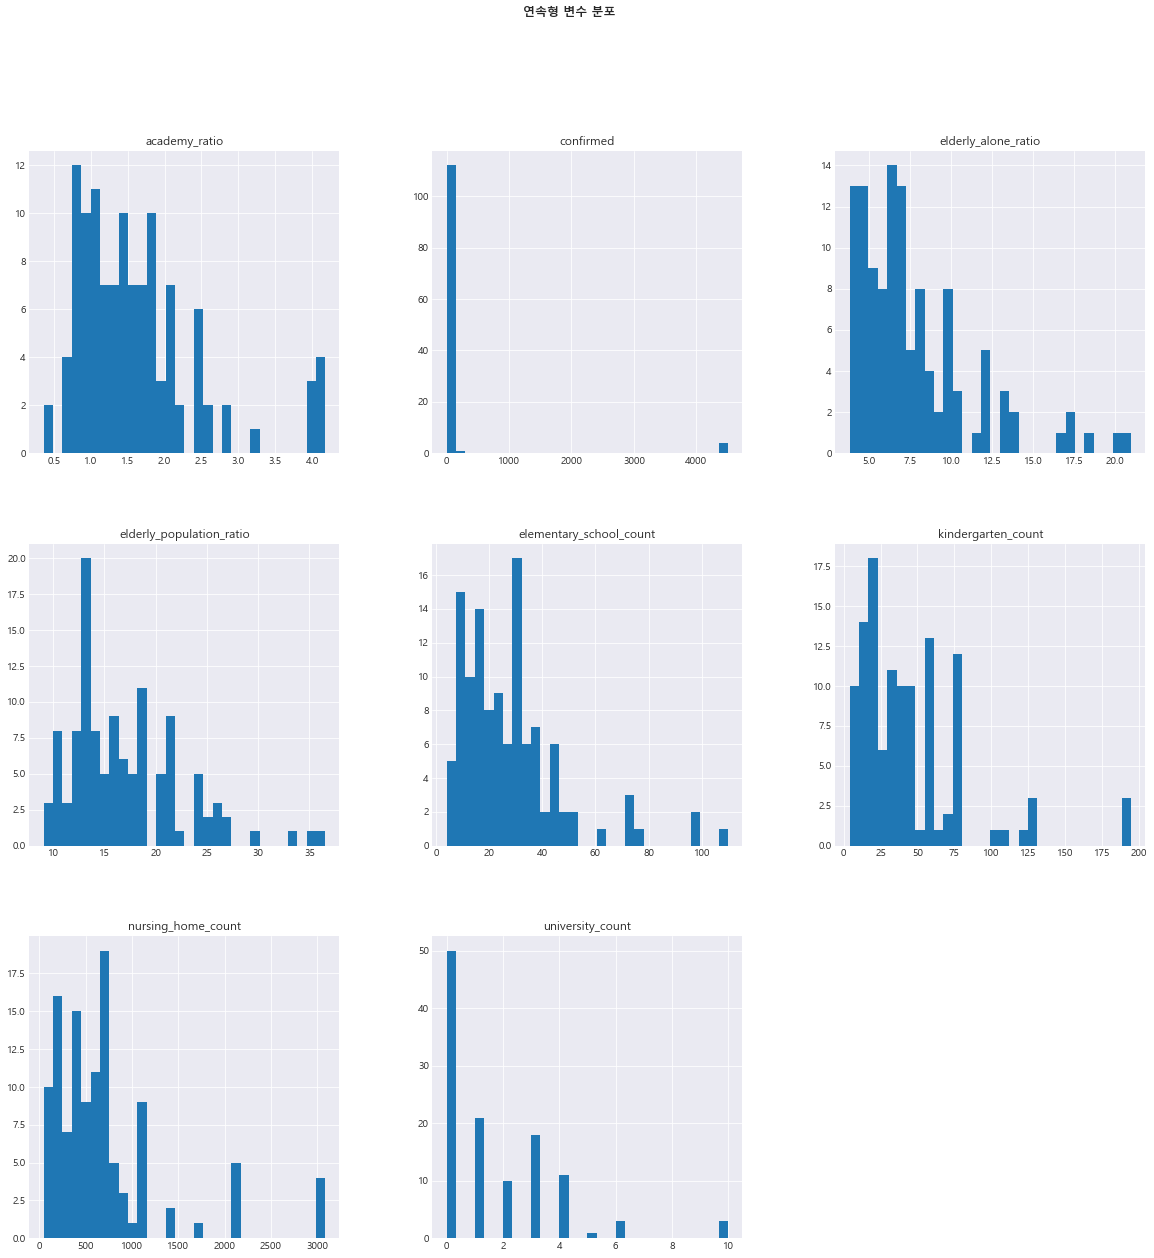

In [66]:
# 모든 연속형 변수의 분포를 histogram으로 확인
g = data.hist(bins=30, figsize=(20,20))
plt.suptitle('연속형 변수 분포', ha = 'center', fontweight=800)
plt.show()

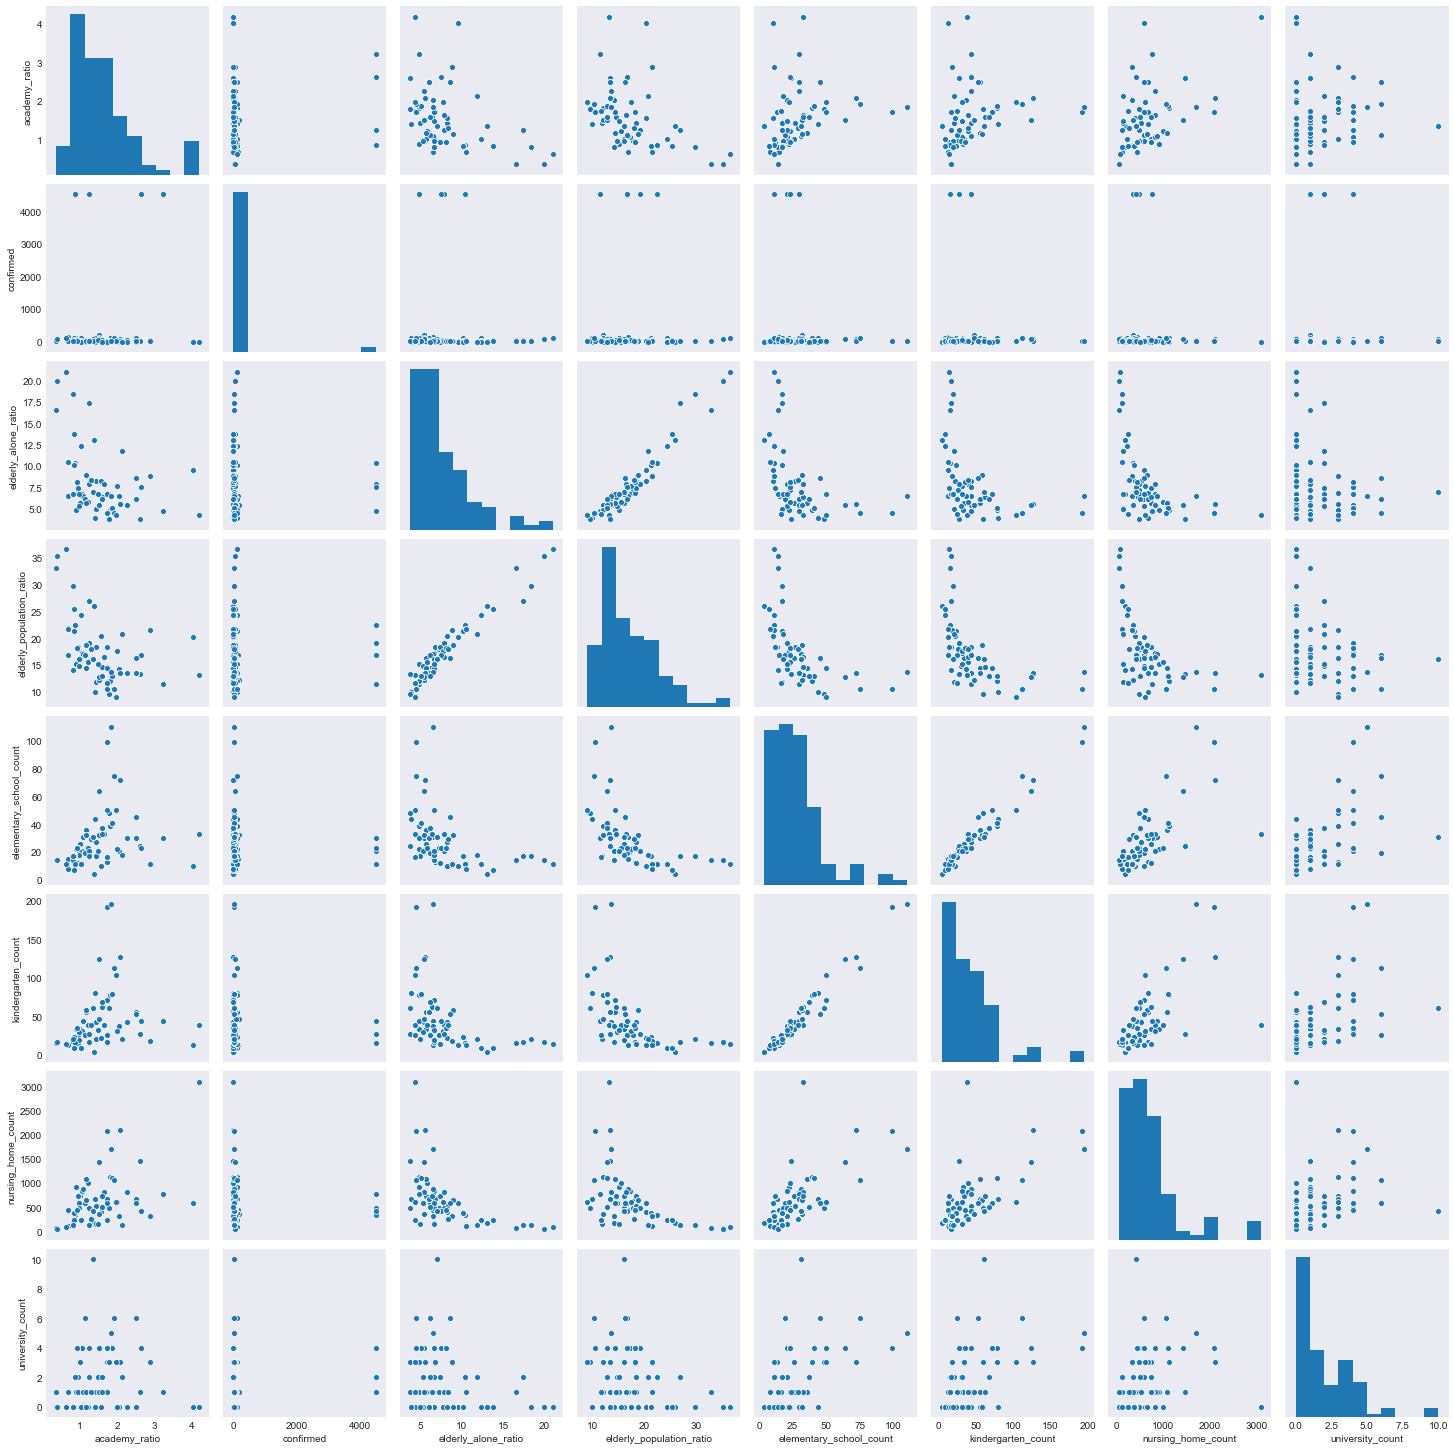

In [41]:
# 전체 데이터 프레임에 대한 연속형변수 시각화 : pairplot
sns.pairplot(data)

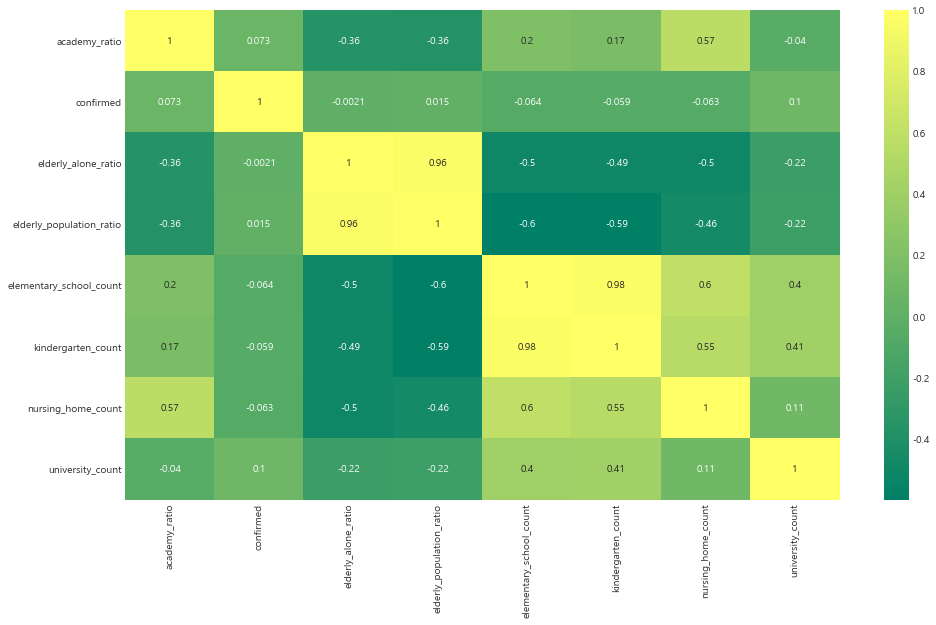

In [49]:
# 모든 연속형 변수 간의 상관관계 확인 - Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cmap='summer', annot=True)
plt.show()

target을 corfirmed 로 놨기 때문에 confirmed 행을 보면 대학수와 그나마 높은 것을 볼 수 있다.

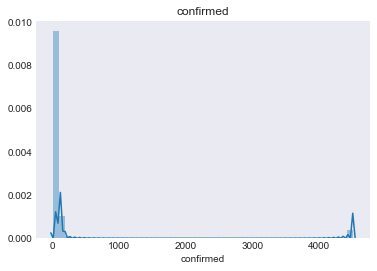

In [43]:
# 확진자 수 분포
plt.title('confirmed')
sns.distplot(data['confirmed'])
plt.show()

confirmed 컬럼에 이상치가 있는 것을 볼 수 있는데 대구 발생률인 듯  
boxplot 확인 후 1000 아래인 것만 보자

{'whiskers': [<matplotlib.lines.Line2D at 0x274da367f08>,
 'caps': [<matplotlib.lines.Line2D at 0x274da36cac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x274da367708>],
 'medians': [<matplotlib.lines.Line2D at 0x274da371b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x274da375948>],
 'means': []}

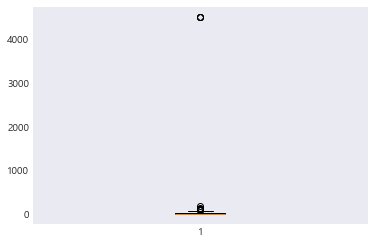

In [69]:
plt.boxplot(data['confirmed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x274da417088>,
 'caps': [<matplotlib.lines.Line2D at 0x274da41ac08>,
 'boxes': [<matplotlib.lines.Line2D at 0x274da3b9608>],
 'medians': [<matplotlib.lines.Line2D at 0x274da3d20c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x274da448fc8>],
 'means': []}

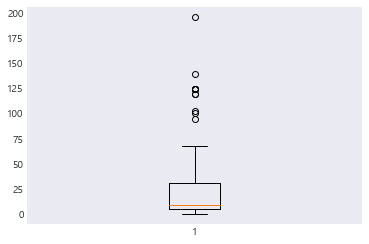

In [70]:
processed_data = data[data['confirmed']<1000]
plt.boxplot(processed_data['confirmed'])

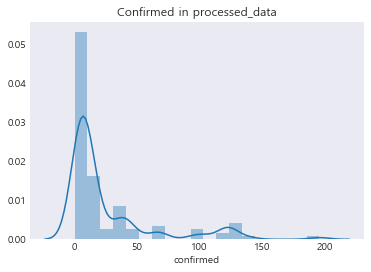

In [71]:
# 확진자 수 분포
plt.title('Confirmed in processed_data')
sns.distplot(processed_data['confirmed'])
plt.show()

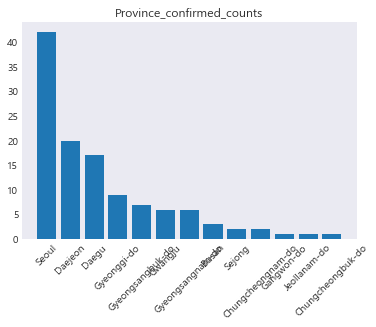

In [73]:
# 케이스별 지역 확진자 수 분포 
# case_id 컬럼이 있는 케이스로 나눠지는 데이터였기 때문

region_count = data['province_x'].value_counts()
plt.bar(region_count.index, region_count)
plt.xticks(rotation=45)
plt.title('Province_confirmed_counts')
plt.show()

infection_case : 감염사례  
라는 재밌는 컬럼이 있다. 감염 case_id 들의 감염 사례들은 어떤 것으로 이뤄져 있나 보자

In [78]:
# data 에서 진행
# 사례 종류들은 어떤 것일까
print('사례 갯수 : ',len(data['infection_case'].unique()))
data['infection_case'].unique()

사례 갯수 :  67


array(['Itaewon Clubs', 'Richway', 'Wangsung Church',
       'Guro-gu Call Center', 'Manmin Central Church', 'Daezayeon Korea',
       'Yangcheon Table Tennis Club', 'Biblical Language study meeting',
       'Day Care Center', 'Dongan Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Korea Campus Crusade of Christ',
       'Samsung Medical Center', 'Gangnam Yeoksam-dong gathering',
       'Gangnam Dongin Church', 'Samsung Fire & Marine Insurance',
       'Jung-gu Fashion Company', 'KB Life Insurance',
       'Seoul City Hall Station safety worker', 'Yeonana News Class',
       'Geumcheon-gu rice milling machine manufacture',
       'Yeongdeungpo Learning Institute', 'Seocho Family',
       'SJ Investment Call Center', 'Onchun Church',
       'Suyeong-gu Kindergarten', 'Haeundae-gu Catholic Church',
       'Shincheonji Church', 'Second Mi-Ju Hospital',
       'Daesil Convalescent Hospital', 'Hansarang Convalescent Hospital',
       '

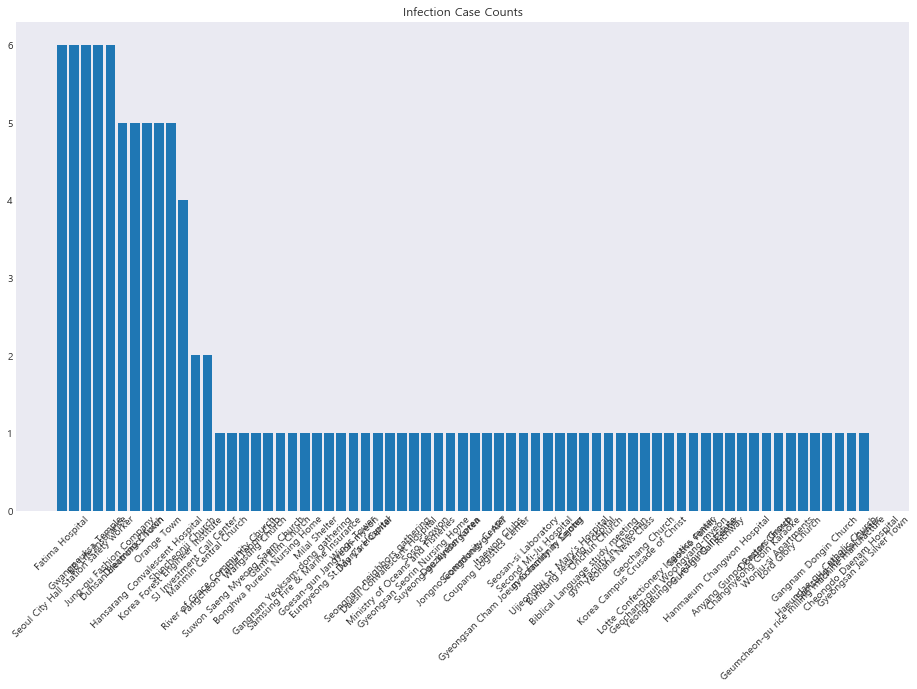

In [81]:
case_count = data['infection_case'].value_counts()
plt.figure(figsize=(16,9))
plt.bar(case_count.index, case_count)
plt.xticks(rotation=45)
plt.title('Infection Case Counts')
plt.show()

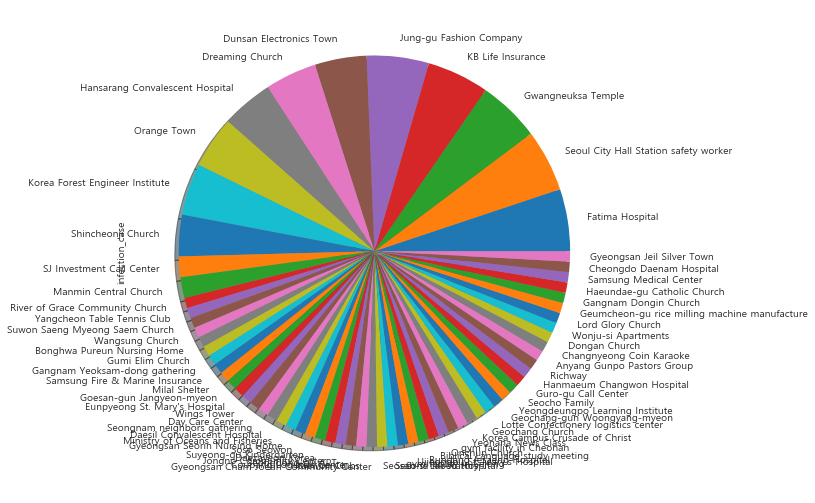

In [114]:
# pie chart
#plt.axis('equal')     # 설정
plt.figure(figsize=(16,9))
case_count.plot.pie(shadow=True)      # 귀찮으니깐 디폴트

데이터가 117개인데 사례가 67개이다 2번이상 발생한 사례는 뭔가 보기나 하자

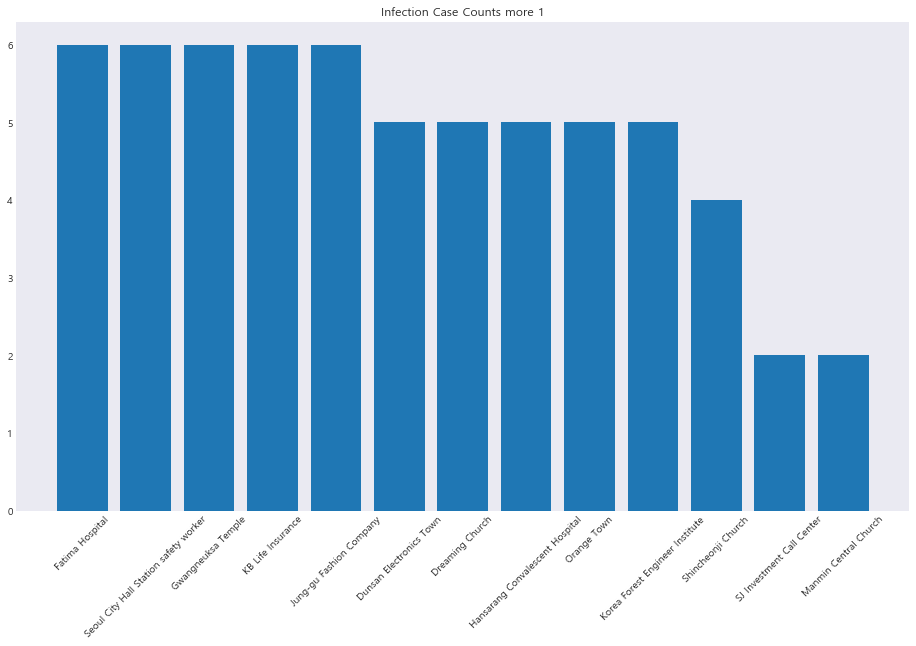

In [82]:
# bar chart
case_many_count = case_count[case_count > 1] 
plt.figure(figsize=(16,9))
plt.bar(case_many_count.index, case_many_count)
plt.xticks(rotation=45)
plt.title('Infection Case Counts more 1')
plt.show()

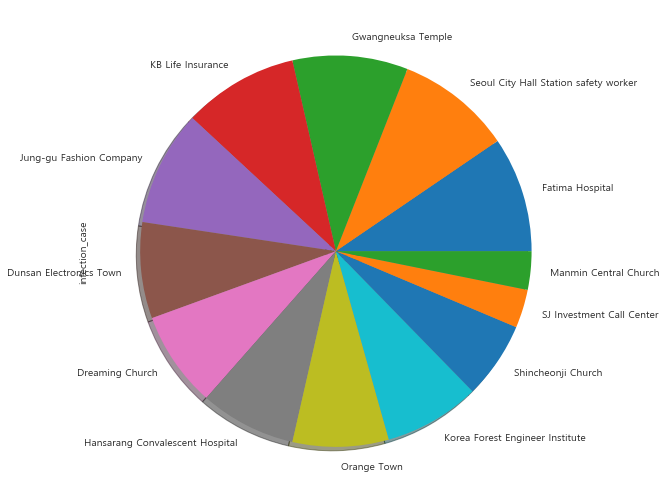

In [113]:
# pie chart
#plt.axis('equal')     # 설정
plt.figure(figsize=(16,9))
case_many_count.plot.pie(shadow=True)      # 귀찮으니깐 디폴트

In [83]:
case_many_count

Fatima Hospital                          6
Seoul City Hall Station safety worker    6
Gwangneuksa Temple                       6
KB Life Insurance                        6
Jung-gu Fashion Company                  6
Dunsan Electronics Town                  5
Dreaming Church                          5
Hansarang Convalescent Hospital          5
Orange Town                              5
Korea Forest Engineer Institute          5
Shincheonji Church                       4
SJ Investment Call Center                2
Manmin Central Church                    2
Name: infection_case, dtype: int64

Fatima Hospital, Seoul City Hall Station safety worker, Gwangneuksa Temple, KB Life Insurance, Jung-gu Fashion Company 가 사례로는 가장 많았다.  
그럼 그냥 확진자를 많이 발생시킨 사례는 뭘까?  

In [98]:
# 확진자 10명이상 집단 감염 사례
confirmed10 = data[data['confirmed'] >= 10]
print('10명 이상 집단 감염사례 : ',confirmed10.shape[0])
confirmed10.head(2)

10명 이상 집단 감염사례 :  59


,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1


In [99]:
# 확진자 100명이상 집단 감염 사례
confirmed100 = data[data['confirmed'] >= 100]
print('100명 이상 집단 감염사례 : ',confirmed100.shape[0])
confirmed10.head(2)

100명 이상 집단 감염사례 :  15


,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1


In [102]:
# 확진자 200명이상 집단 감염 사례
confirmed200 = data[data['confirmed'] >= 200]
print('200명 이상 집단 감염사례 : ',confirmed200.shape[0])
print('집단 감염 확진자 수 최대 ', max(data.confirmed),'명')
confirmed200.head()

200명 이상 집단 감염사례 :  4
집단 감염 확진자 수 최대  4511 명


,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count
45,1.24,Nam-gu,4511,7.9,19.13,21,Shincheonji Church,27,35.84008,128.5667,475,Daegu,4
46,0.85,Nam-gu,4511,10.4,22.49,11,Shincheonji Church,15,35.84008,128.5667,345,Daegu,2
47,2.63,Nam-gu,4511,7.5,16.76,23,Shincheonji Church,44,35.84008,128.5667,427,Daegu,4
48,3.23,Nam-gu,4511,4.8,11.42,30,Shincheonji Church,44,35.84008,128.5667,765,Daegu,1


위의 4가지 경우가 집단 감염 200명 이상의 사례 4가지이다. 다만 모두 대구 남구 신천지 교회에서 발생한 사례들인데 확진자수가 모두 4511명으로 카운트 되었다.  
동일 사례가 4번 카운트 된 것 같은데 다른 변수는 또 값이 다르다. raw 데이터 파일의 문제인 것 같다.

20세 이하의 아동,청소년들은 얼마나 위험에 노출되었을까? 간접적으로 감염사례의 교육시설의 수로 알아보도록 하자 - 피쳐생성 #1

In [115]:
# children_facility 컬럼 생성, 대학은 제외
data['children_facility'] = data.elementary_school_count + data.kindergarten_count
data.head(2)

,academy_ratio,city,confirmed,elderly_alone_ratio,elderly_population_ratio,elementary_school_count,infection_case,kindergarten_count,latitude_x,longitude_x,nursing_home_count,province_x,university_count,children_facility
0,0.68,Yongsan-gu,139,6.5,16.87,15,Itaewon Clubs,13,37.538621,126.992652,435,Seoul,1,28
1,0.89,Gwanak-gu,119,4.9,15.12,22,Richway,33,37.48208,126.901384,909,Seoul,1,55


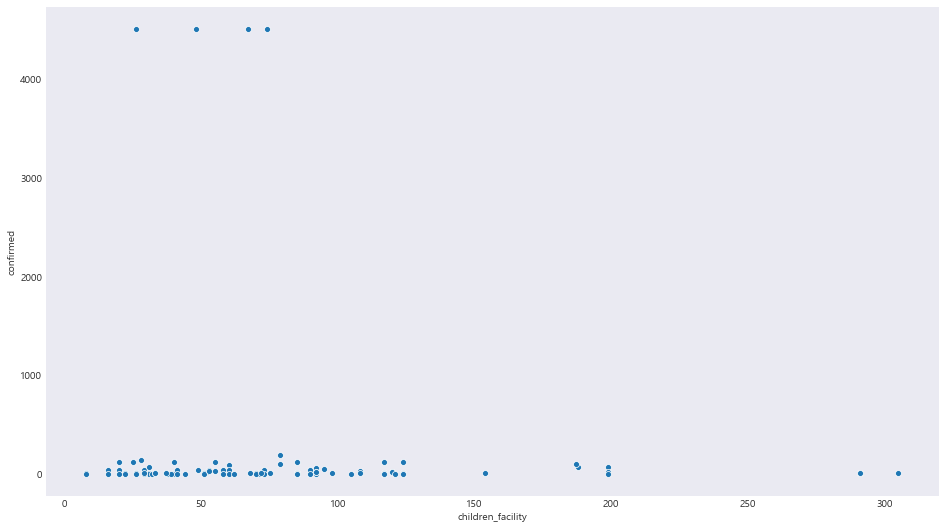

In [107]:
# children_facility 의 수와 확진자 수를 scatter plot 그림
plt.figure(figsize=(16,9))
sns.scatterplot(x=data['children_facility'], y=data['confirmed'])
plt.show()

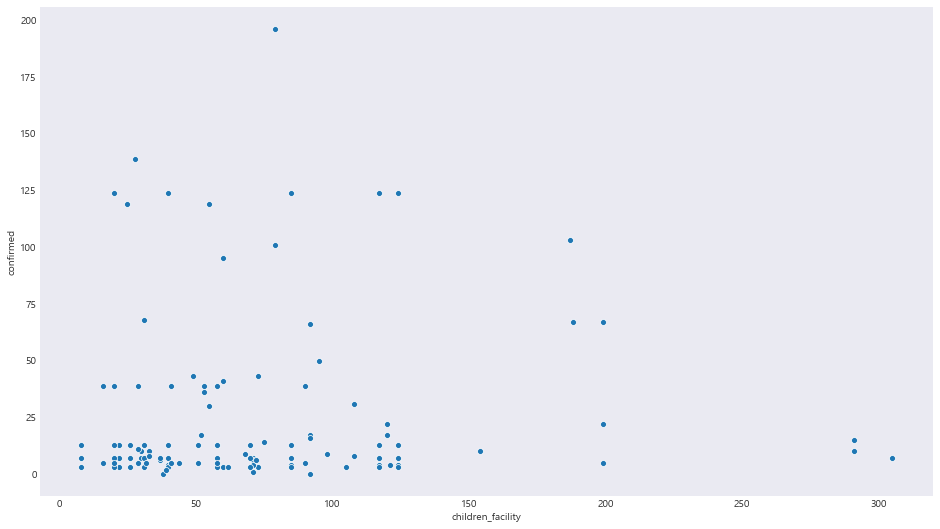

In [108]:
# 이상치 대구때문에 보기가 힘드니깐 processed_data에서도 그려보자
processed_data['children_facility'] = processed_data.elementary_school_count + processed_data.kindergarten_count
# children_facility 의 수와 확진자 수를 scatter plot 그림
plt.figure(figsize=(16,9))
sns.scatterplot(x=processed_data['children_facility'], y=processed_data['confirmed'])
plt.show()

사실 딱히 눈에 보이는 인사이트는 없다  
일단 교육시설 갯수가 100개 이상인 곳이 급격하게 적다.

## 인사이트 도출 메모 

>### 피쳐생성
1. 교육시설 갯수 : children_facility
2. 
3. 